In [1]:
WHO = read.csv("WHO.csv")

In [2]:
str(WHO)

'data.frame':	194 obs. of  13 variables:
 $ Country                      : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Region                       : Factor w/ 6 levels "Africa","Americas",..: 3 4 1 4 1 2 2 4 6 4 ...
 $ Population                   : int  29825 3162 38482 78 20821 89 41087 2969 23050 8464 ...
 $ Under15                      : num  47.4 21.3 27.4 15.2 47.6 ...
 $ Over60                       : num  3.82 14.93 7.17 22.86 3.84 ...
 $ FertilityRate                : num  5.4 1.75 2.83 NA 6.1 2.12 2.2 1.74 1.89 1.44 ...
 $ LifeExpectancy               : int  60 74 73 82 51 75 76 71 82 81 ...
 $ ChildMortality               : num  98.5 16.7 20 3.2 163.5 ...
 $ CellularSubscribers          : num  54.3 96.4 99 75.5 48.4 ...
 $ LiteracyRate                 : num  NA NA NA NA 70.1 99 97.8 99.6 NA NA ...
 $ GNI                          : num  1140 8820 8310 NA 5230 ...
 $ PrimarySchoolEnrollmentMale  : num  NA NA 98.2 78.4 93.1 91.1 NA NA 96.9 NA ...
 $ Prim

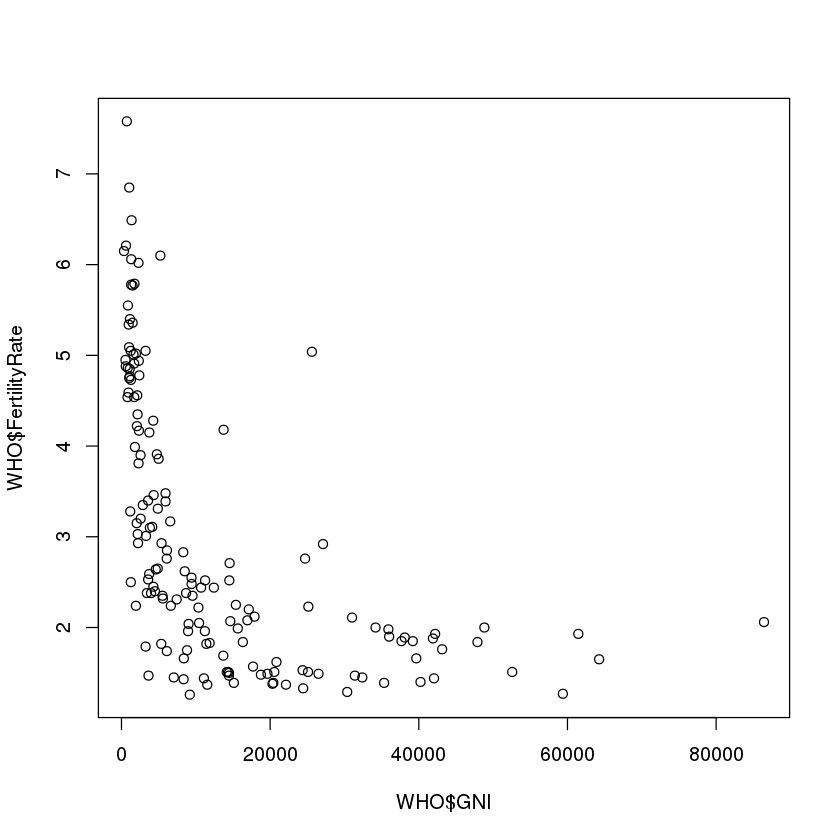

In [3]:
plot(WHO$GNI,WHO$FertilityRate)

In [5]:
library(ggplot2)

In [6]:
scatterplot = ggplot(WHO, aes(x = GNI,y = FertilityRate))

Warning message:
: Removed 35 rows containing missing values (geom_point).

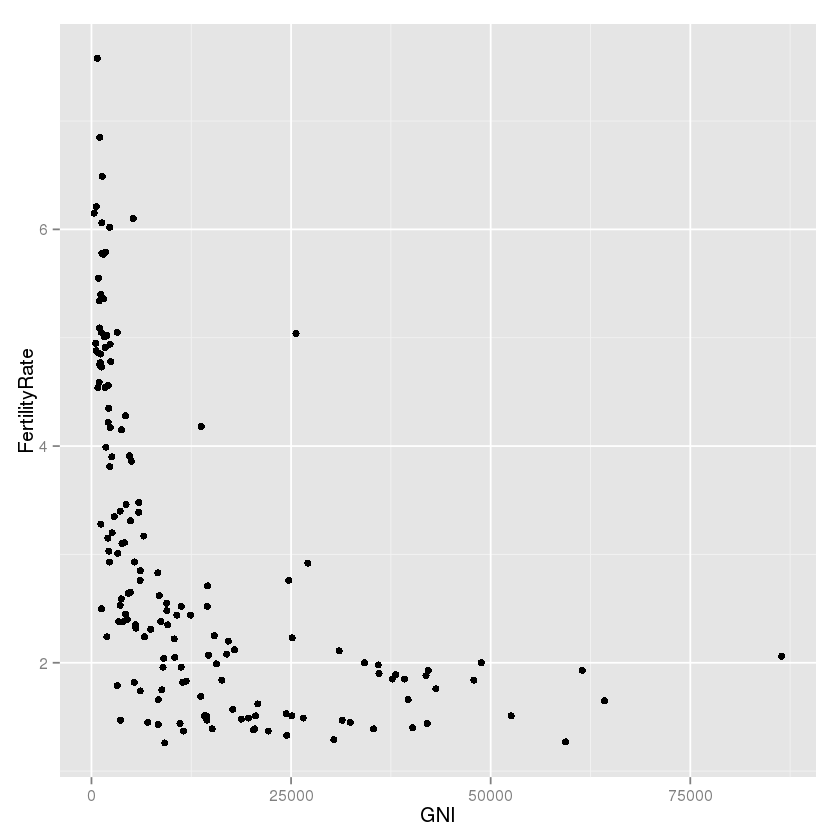

In [8]:
scatterplot + geom_point()

Warning message:
: Removed 32 rows containing missing values (geom_path).

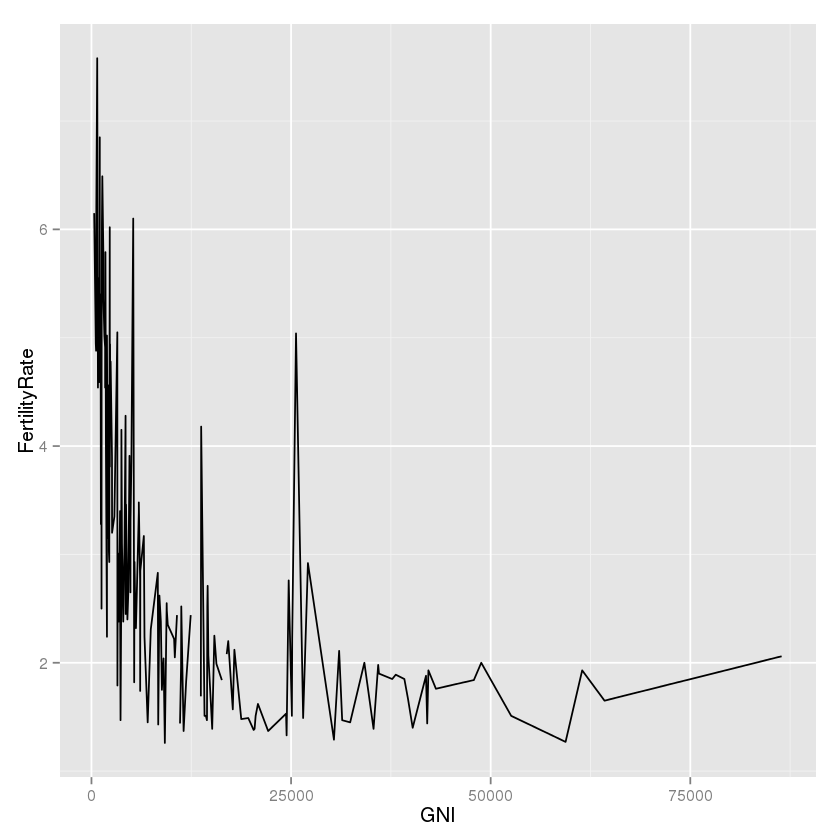

In [10]:
scatterplot+geom_line()

Warning message:
: Removed 35 rows containing missing values (geom_point).

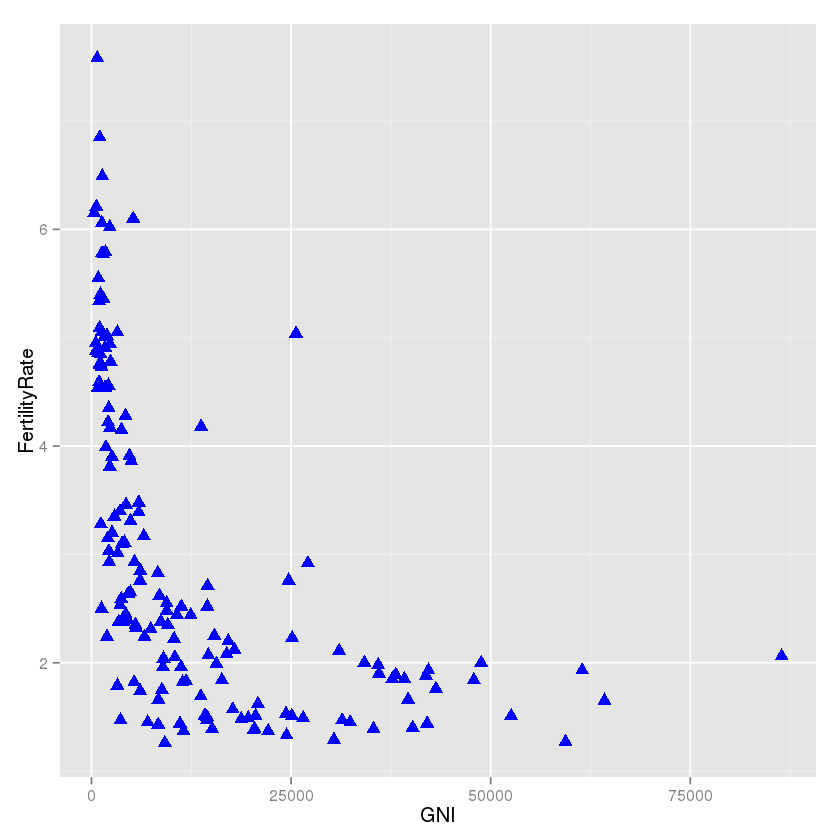

In [11]:
scatterplot+geom_point(color = "blue", shape = 17, size = 3)

In [14]:
FR_GNIPlot = scatterplot+geom_point(color = "darkred", shape = 8, size = 3)+ggtitle("Fertility Rate Vs. Gross National Income")

Warning message:
: Removed 35 rows containing missing values (geom_point).

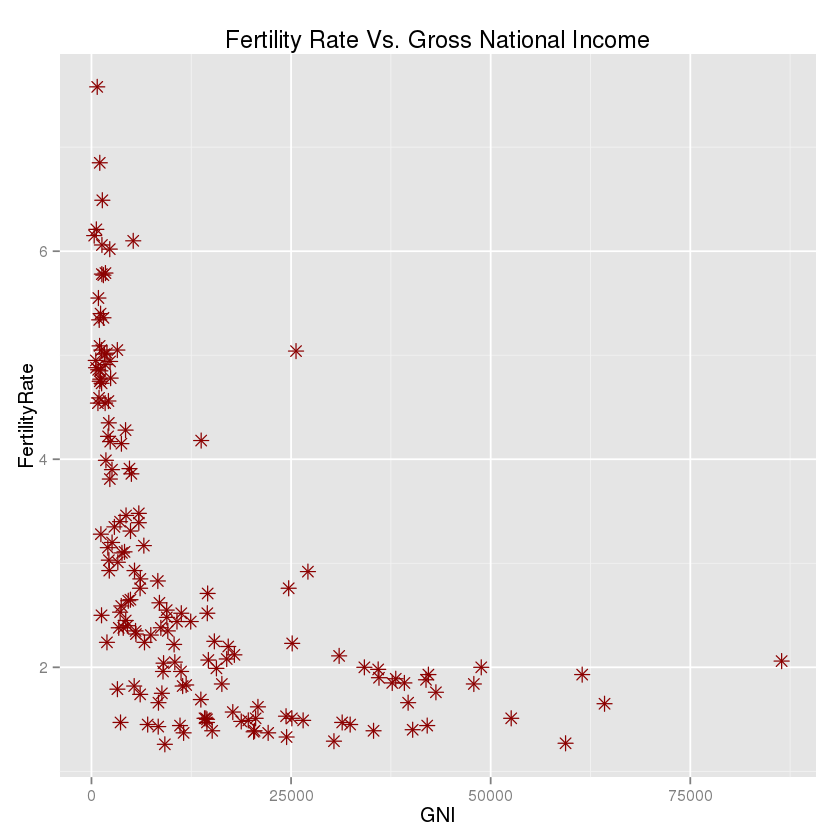

In [15]:
FR_GNIPlot

In [19]:
pdf("generated_plot.pdf")
print(FR_GNIPlot)
dev.off()

Warning message:
: Removed 35 rows containing missing values (geom_point).

pdf 
  2

Warning message:
: Removed 35 rows containing missing values (geom_point).

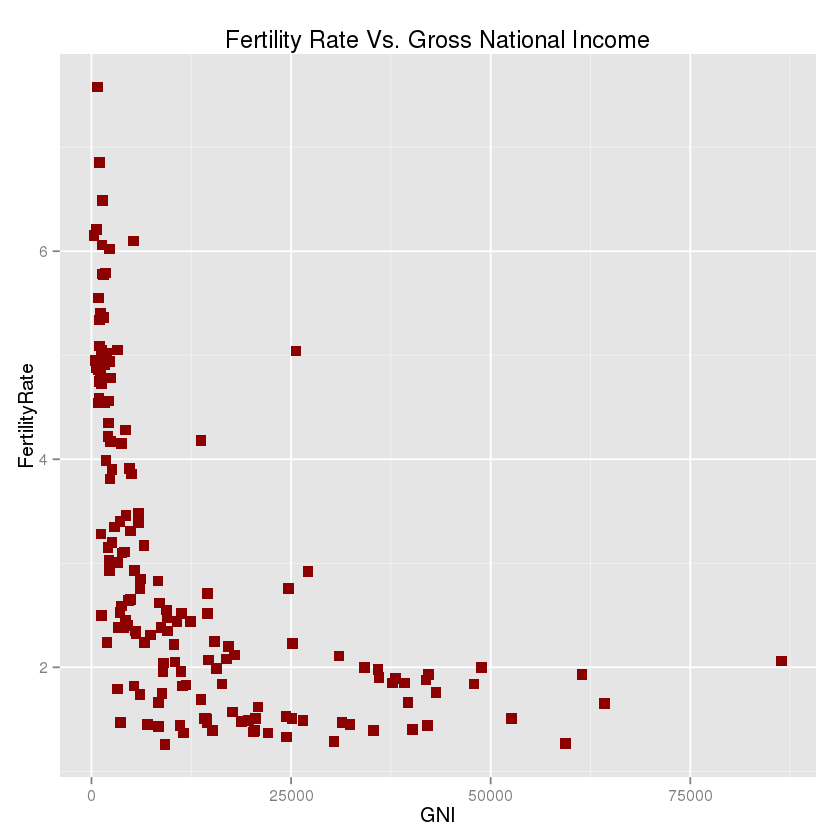

In [20]:
scatterplot+geom_point(color = "darkred", shape = 15, size = 3)+ggtitle("Fertility Rate Vs. Gross National Income")

https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/5abd4e9833ed47b2b4eae8827f83d516/a4551d160c0a44b382105c455a7f6307/

Warning message:
: Removed 35 rows containing missing values (geom_point).

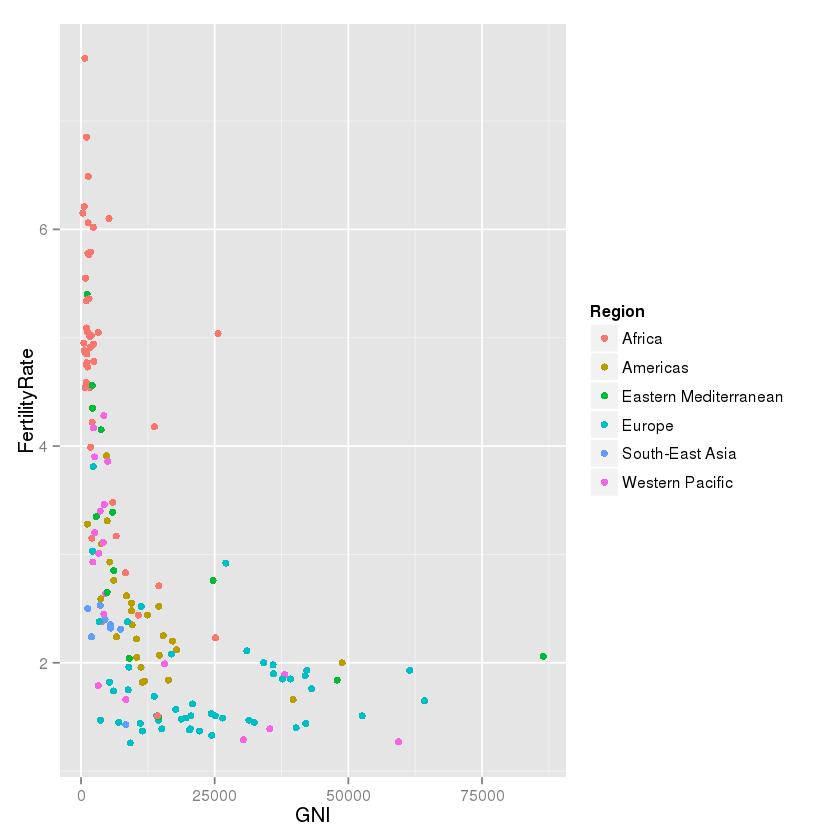

In [25]:
ggplot(WHO, aes(x = GNI,y = FertilityRate, color = Region))+ geom_point()

Let's now instead color the points
according to the country's life expectancy.
To do this, we just have to hit the up arrow
to get back to our ggplot line, and then
delete Region and type LifeExpectancy.


Warning message:
: Removed 35 rows containing missing values (geom_point).

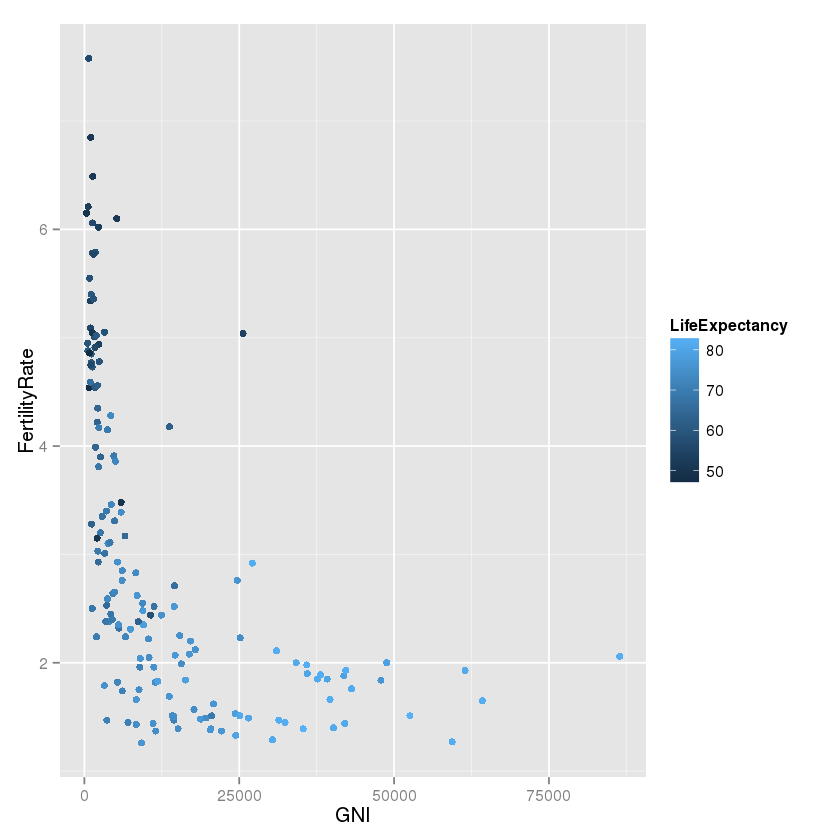

In [26]:
ggplot(WHO, aes(x = GNI,y = FertilityRate, color = LifeExpectancy))+ geom_point()

Let's take a look at a different plot now.
Suppose we were interested in seeing whether the fertility
rate of a country was a good predictor of the percentage
of the population under 15.
Intuitively, we would expect these variables
to be highly correlated.


Warning message:
: Removed 11 rows containing missing values (geom_point).

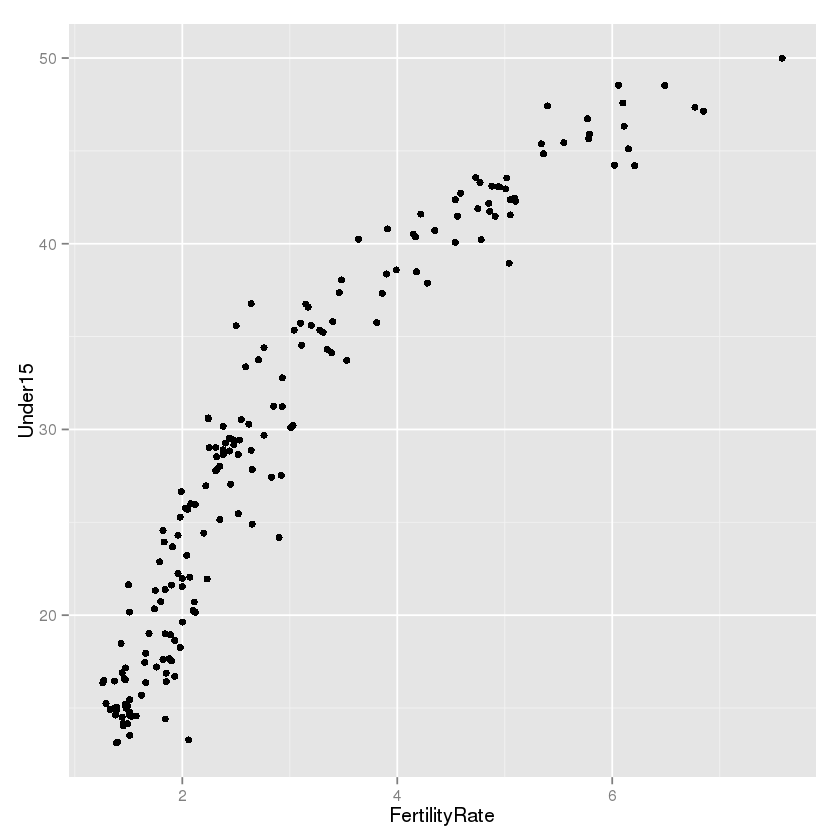

In [27]:
ggplot(WHO, aes(x = FertilityRate, y = Under15))+ geom_point()

This is really interesting.
It looks like the variables are certainly correlated,
but as the fertility rate increases, the variable,
Under15 starts increasing less.
So this doesn't really look like a linear relationship.
But we suspect that a log transformation of FertilityRate
will be better.
Let's give it a shot.
So go ahead and scroll up in your R console
to the previous line, and instead of x = FertilityRate,
we want x = log(FertilityRate).
And hit Enter.
Now this looks like a linear relationship.


Warning message:
: Removed 11 rows containing missing values (geom_point).

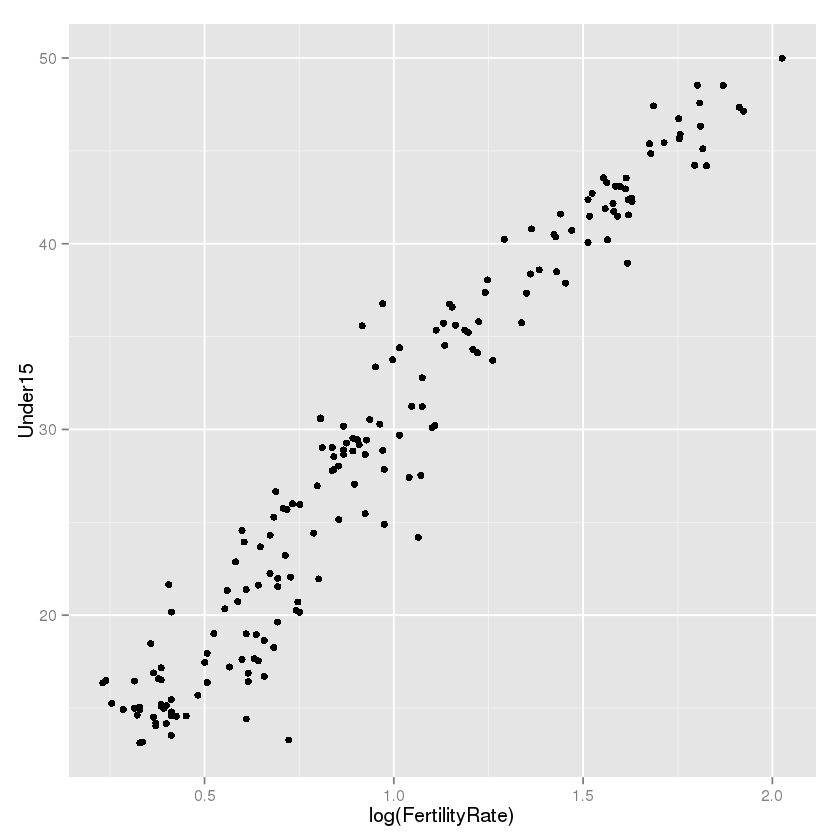

In [28]:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15))+ geom_point()

In [33]:
cor(WHO)

ERROR: Error in cor(WHO): 'x' must be numeric


In [34]:
model = lm(Under15~FertilityRate, data = WHO)

In [35]:
summary(model)


Call:
lm(formula = Under15 ~ FertilityRate, data = WHO)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3340  -3.0347   0.0219   2.9298   9.8841 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.0161     0.6221   14.49   <2e-16 ***
FertilityRate   6.7689     0.1891   35.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.777 on 181 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.8763,	Adjusted R-squared:  0.8756 
F-statistic:  1282 on 1 and 181 DF,  p-value: < 2.2e-16


In [36]:
model = lm(Under15~log(FertilityRate), data = WHO)

In [37]:
summary(model)


Call:
lm(formula = Under15 ~ log(FertilityRate), data = WHO)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3131  -1.7742   0.0446   1.7440   7.7174 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.6540     0.4478   17.09   <2e-16 ***
log(FertilityRate)  22.0547     0.4175   52.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 181 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.9391,	Adjusted R-squared:  0.9387 
F-statistic:  2790 on 1 and 181 DF,  p-value: < 2.2e-16


Warning message:
: Removed 11 rows containing missing values (stat_smooth).Warning message:
: Removed 11 rows containing missing values (geom_point).

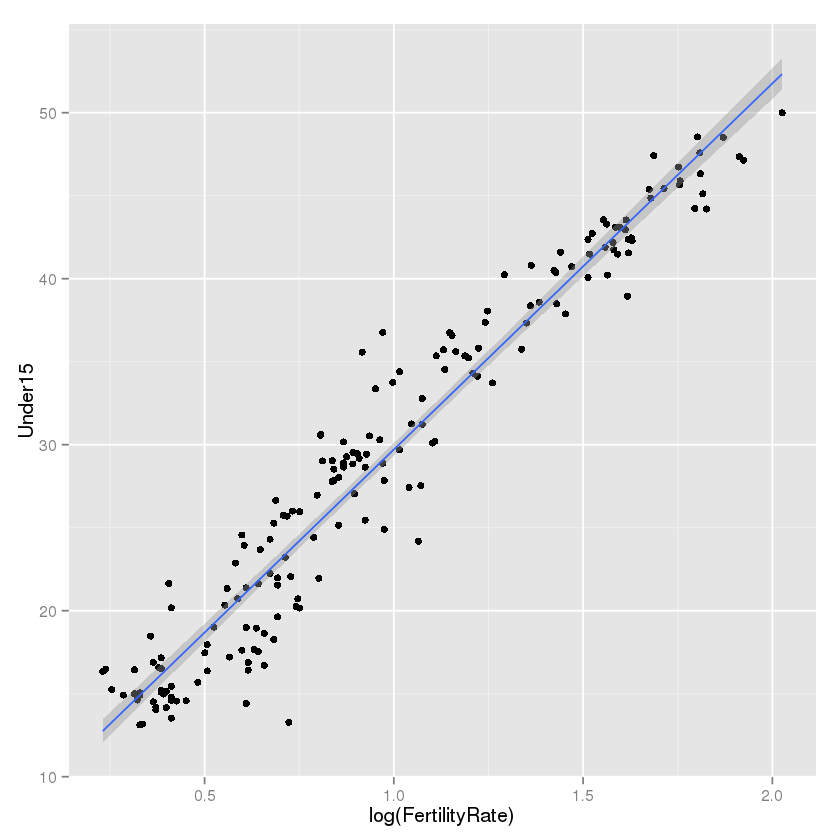

In [38]:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15))+ geom_point()+stat_smooth(method = lm)

So now, let's add this regression line to our plot.
This is pretty easy in ggplot.
We just have to add another layer.
So use the up arrow in your R console to get back
to the plotting line, and then add stat_smooth(method = "lm"),
and hit Enter.
Now, you should see a blue line going through the data.
This is our regression line.
By default, ggplot will draw a 95% confidence
interval shaded around the line.
We can change this by specifying options
within the statistics layer.
So go ahead and scroll up in the R console,
and after method = "lm", type level = 0.99, and hit Enter.
This will give a 99% confidence interval.
We could instead take away the confidence interval altogether
by deleting level = 0.99 and typing se = FALSE.
Now, we just have the regression line in blue.
\

Warning message:
: Removed 11 rows containing missing values (stat_smooth).Warning message:
: Removed 11 rows containing missing values (geom_point).

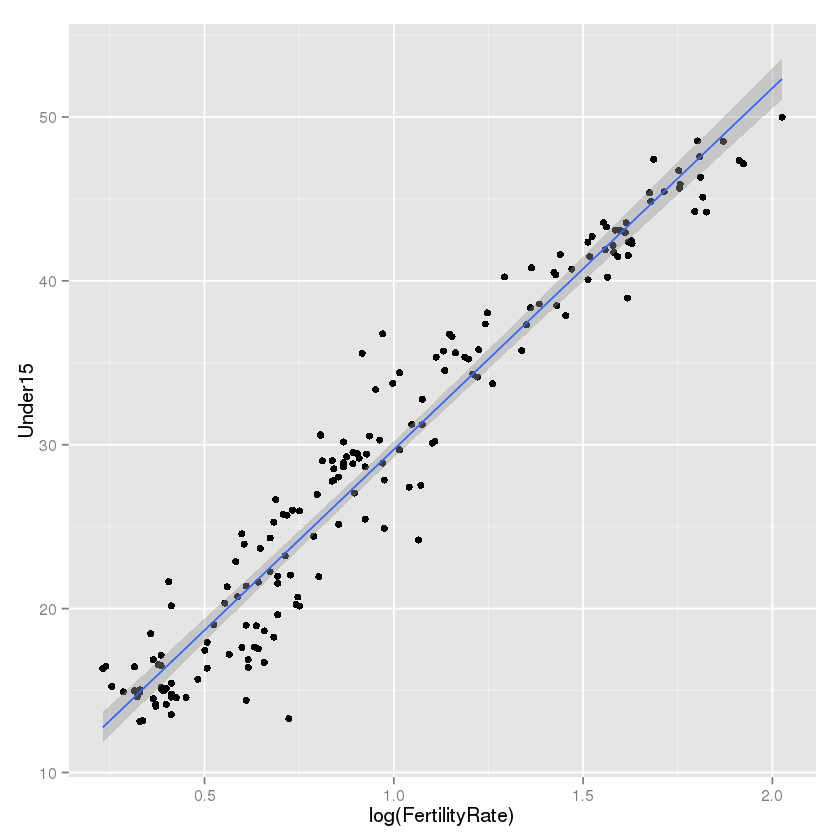

In [39]:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15))+ geom_point()+stat_smooth(method = lm, level = 0.99)

Warning message:
: Removed 11 rows containing missing values (stat_smooth).Warning message:
: Removed 11 rows containing missing values (geom_point).

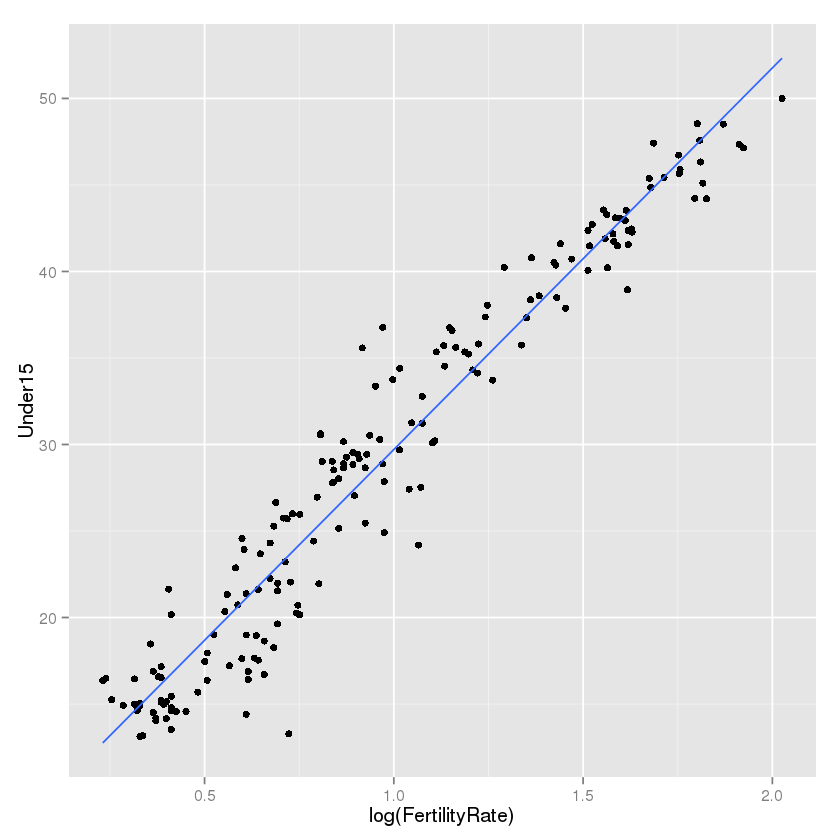

In [40]:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15))+ geom_point()+stat_smooth(method = lm, se = FALSE)

Warning message:
: Removed 11 rows containing missing values (stat_smooth).Warning message:
: Removed 11 rows containing missing values (geom_point).

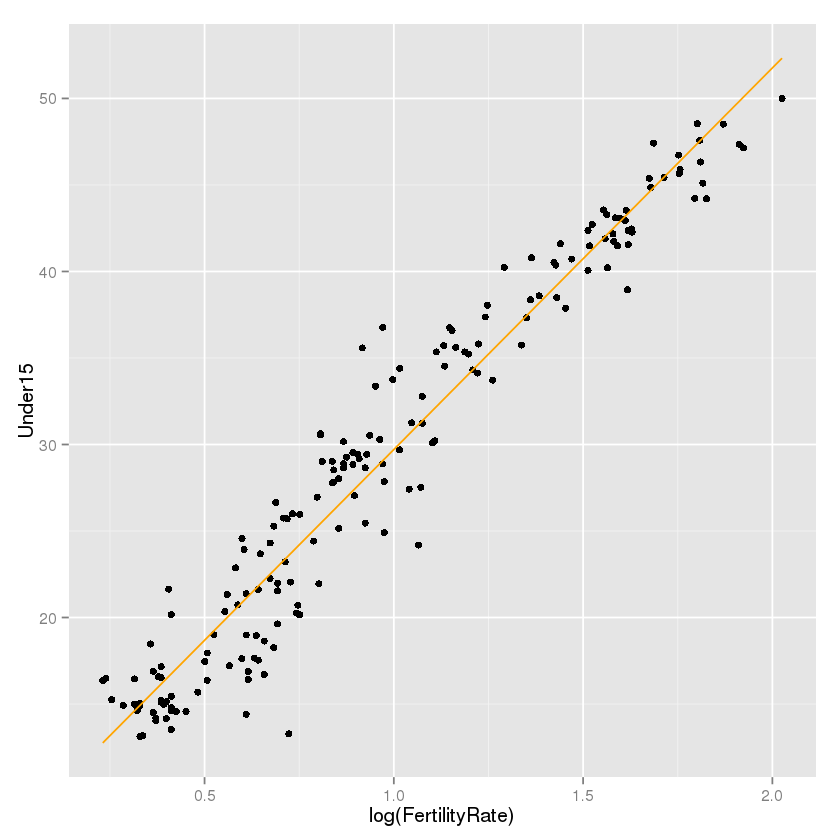

In [41]:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15))+ geom_point()+stat_smooth(method = lm, se = FALSE, color = "orange")

Warning message:
: Removed 11 rows containing missing values (geom_point).

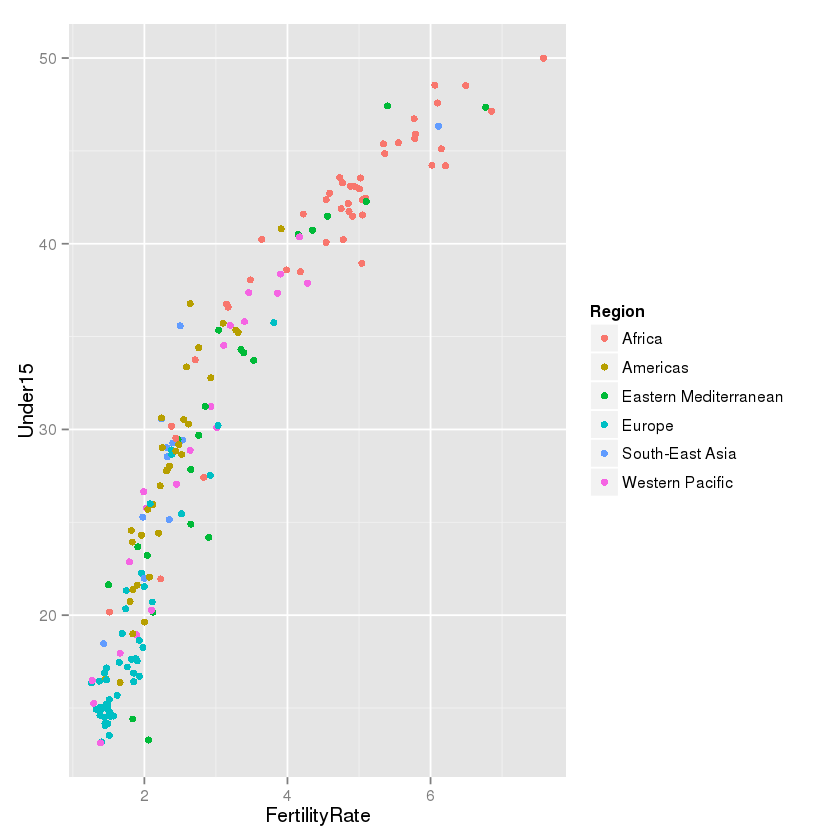

In [43]:
ggplot(WHO, aes(x = FertilityRate, y = Under15,  color = Region)) + geom_point()

Warning message:
: Removed 11 rows containing missing values (geom_point).

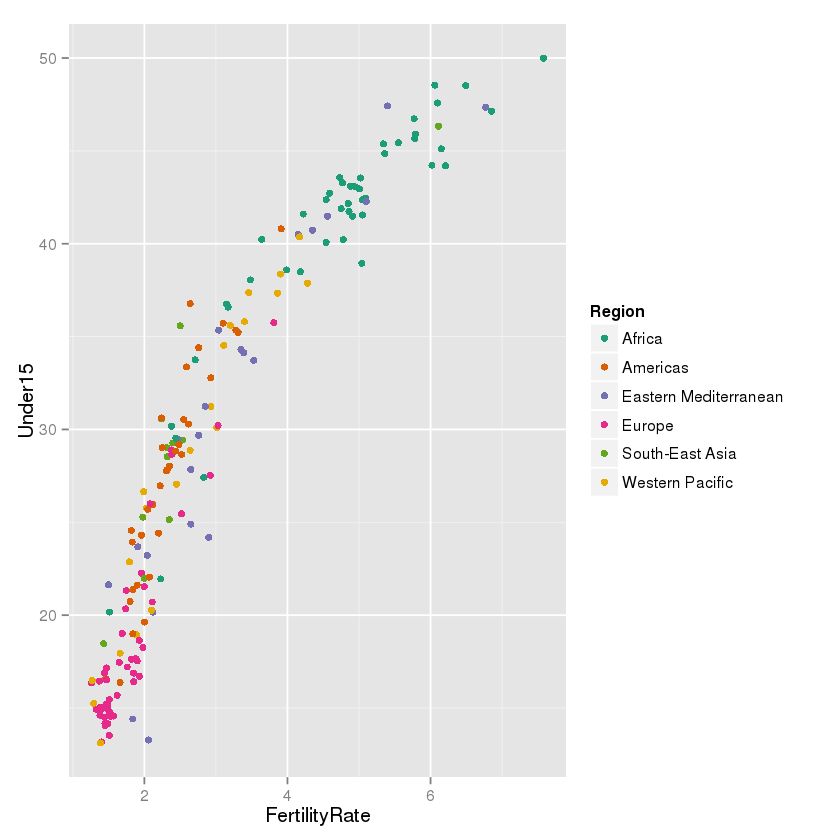

In [45]:
ggplot(WHO, aes(x = FertilityRate, y = Under15,  color = Region)) + geom_point()+scale_color_brewer(palette="Dark2")